# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [5]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

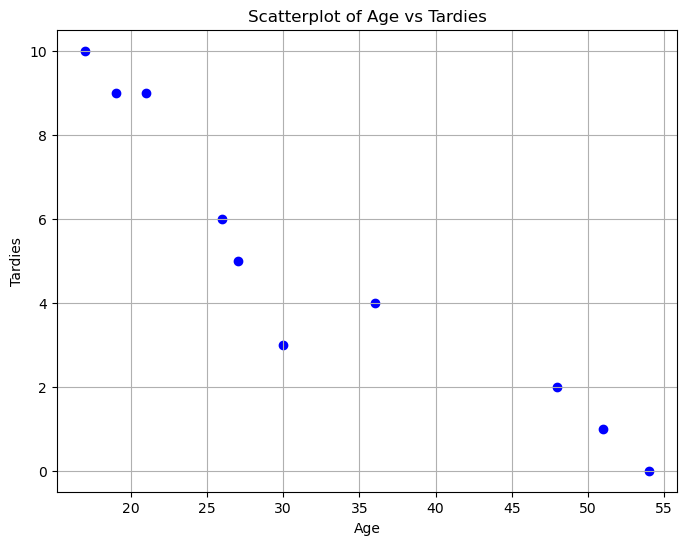

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(student_data['Age'], student_data['Tardies'], color='blue')
plt.title('Scatterplot of Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.grid(True)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*

younger students have more tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [10]:
# your code here
covariance = student_data['Age'].cov(student_data['Tardies'])
correlation = student_data['Age'].corr(student_data['Tardies'])

covariance, correlation
# The covariance suggests a that with the increase of age, tardiness decreases, while the correlation indicates a strong inverse relationship between age and tardiness

(-45.56666666666667, -0.9391626886887122)

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [16]:
# your explanation here
import statsmodels.api as sm


X = student_data['Age']  
y = student_data['Tardies']  

# Adding a constant 
X = sm.add_constant(X)

# Ordinary Least Squares regression
model = sm.OLS(y, X).fit()


model.summary()


C:\Users\igriz\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           5.57e-05
Time:                        17:05:41   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

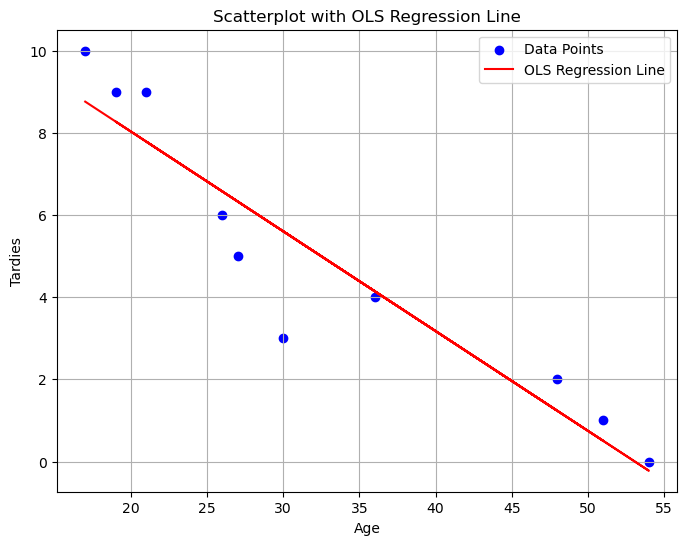

In [20]:
# Your code here.
predicted_tardies = model.predict(X)

# Plotting the scatter plot and the OLS regression line
plt.figure(figsize=(8, 6))
plt.scatter(student_data['Age'], student_data['Tardies'], color='blue', label='Data Points')
plt.plot(student_data['Age'], predicted_tardies, color='red', label='OLS Regression Line')
plt.title('Scatterplot with OLS Regression Line')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.grid(True)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*
Yes, age has a inverse correlation to tardiness. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [30]:
# Import any libraries you may need & the data
vehicles = pd.read_csv(r"C:\Users\igriz\Documents\BOOTCAMP 2024\WEEK 4\DAY3\lab-regression-analysis-en-main\lab-regression-analysis-en-main\vehicles.csv")
vehicles.head

<bound method NDFrame.head of                    Make                Model  Year  Engine Displacement  \
0            AM General    DJ Po Vehicle 2WD  1984                  2.5   
1            AM General     FJ8c Post Office  1984                  4.2   
2            AM General  Post Office DJ5 2WD  1985                  2.5   
3            AM General  Post Office DJ8 2WD  1985                  4.2   
4      ASC Incorporated                  GNX  1987                  3.8   
...                 ...                  ...   ...                  ...   
35947             smart         fortwo coupe  2013                  1.0   
35948             smart         fortwo coupe  2014                  1.0   
35949             smart         fortwo coupe  2015                  1.0   
35950             smart         fortwo coupe  2016                  0.9   
35951             smart         fortwo coupe  2016                  0.9   

       Cylinders     Transmission        Drivetrain  \
0            4

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [34]:

# Calculate correlations
correlations = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']].corrwith(vehicles['CO2 Emission Grams/Mile'])

# Print correlations
print(correlations)

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
dtype: float64


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = r2_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9794542628636334


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [38]:

print(f"Coefficients: {dict(zip(X.columns, model.coef_))}")
print(f"R-squared: {r2_score(y_test, y_pred)}") #Model explains about 97.95% of the variance in CO2 emissions
#The coefficients suggest the decrease and increase that each of these variables have on the CO2 emissions, the most influential being Fuel Barrels/Year, while combined MPG and Year are the only to lower CO2 emissions. 

Intercept: 755.6935073143138
Coefficients: {'Year': -0.3155867545878869, 'Cylinders': 1.7940263231032523, 'Fuel Barrels/Year': 19.23102728674001, 'Combined MPG': -2.93357319959156, 'Fuel Cost/Year': 0.031971450640957855}
R-squared: 0.9794542628636334


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [44]:
import pandas as pd

X = [1, 3, 4, 6, 8, 9, 11, 14]
Y = [1, 2, 4, 4, 5, 7, 8, 13]

 
df = pd.DataFrame({'X': X, 'Y': Y})
print(df)

    X   Y
0   1   1
1   3   2
2   4   4
3   6   4
4   8   5
5   9   7
6  11   8
7  14  13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [59]:
import altair as alt
import pandas as pd
import statsmodels.formula.api as sm


model = sm.ols('Y ~ X', data=df).fit() #Linear regression model
df['Y_pred'] = model.predict(df['X']) #regression line

#scatter
scatter_plot = alt.Chart(df).mark_point().encode(
    x='X',
    y='Y',
    tooltip=['X', 'Y']
).properties(
    title='Scatter Plot with Regression Line'
)
#Line chart for the regression line
line_chart = alt.Chart(df).mark_line().encode(
    x='X',
    y='Y_pred'
)
#combine
chart = scatter_plot + line_chart
chart = chart.interactive()

display(chart)
print(model.summary())

alt.LayerChart(...)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           0.000102
Time:                        18:22:38   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.5

C:\Users\igriz\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*
There is a linear relationship between the variables x and y. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [61]:
df = df.drop(df.index[-1])

#scatter
scatter_plot = alt.Chart(df).mark_point().encode(
    x='X',
    y='Y',
    tooltip=['X', 'Y']
).properties(
    title='Scatter Plot with Regression Line'
)
#Line chart for the regression line
line_chart = alt.Chart(df).mark_line().encode(
    x='X',
    y='Y_pred'
)
#combine
chart = scatter_plot + line_chart
chart = chart.interactive()

display(chart)
print(model.summary())

alt.LayerChart(...)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           0.000102
Time:                        18:28:04   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.5

C:\Users\igriz\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*

The last entre in the dataframe 14 and 13, slightly deviated from the linear trend in the data. 